In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df_1 = pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/transaction_data.csv')

In [22]:
df_1.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [23]:
df_1.shape

(5315, 3)

In [24]:
df_1.dtypes

date           object
name           object
transaction    object
dtype: object

In [25]:
df_1.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [26]:
df_1.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


<AxesSubplot:xlabel='index', ylabel='transaction'>

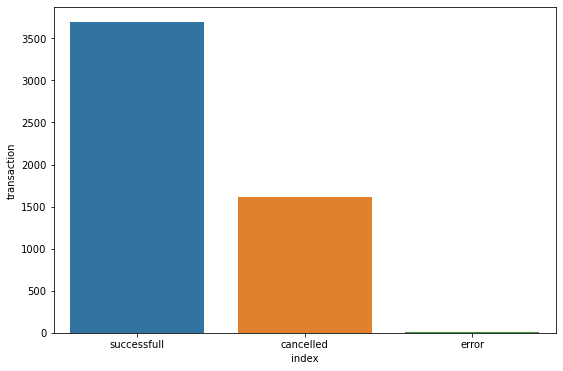

In [27]:
#посмотрим на распределение типов транзакций и построим по нему барплот
transactions = df_1.transaction.value_counts().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='index', y='transaction', data=transactions)

C:\Users\bkunt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='successful_transactions', ylabel='Density'>

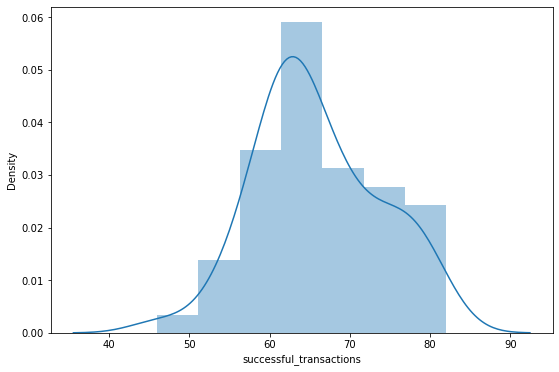

In [28]:
#посмотрим на распределение успешных транзакций для каждого пользователя и построим гистограмму
successful_tr_by_user = df_1.query('transaction == "successfull"') \
                            .groupby('name', as_index=False) \
                            .agg({'transaction': 'count'}) \
                            .rename(columns={'transaction': 'successful_transactions'})

plt.figure(figsize=(9, 6))
sns.distplot(successful_tr_by_user.successful_transactions)

In [33]:
#посмотрим на описательные статистики получившейся переменной
successful_tr_by_user.describe()

,successful_transactions
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [105]:
#загрузим обновленные данные
df_2 = pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/transaction_data_updated.csv', parse_dates=[0])

In [106]:
#данные в колонке date не упорядочены
df_2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [107]:
#отсортируем и посмотрим на последние по времени записи
df_2.sort_values('date', ascending=False)

,date,name,transaction,minute
1025,2020-03-02 01:29:05,Irina_Smirnova,successfull,29
418,2020-03-02 01:29:05,Svetlana_Ivanova,cancelled,29
4358,2020-03-02 01:29:02,Svetlana_Lesnova,successfull,29
873,2020-03-02 01:29:01,Irina_Polyanova,successfull,29
2954,2020-03-02 01:29:00,Vasilisa_Polyanova,cancelled,29
...,...,...,...,...
4208,2020-03-02 00:00:02,Lolita_Polyanova,successfull,0
2869,2020-03-02 00:00:01,Lolita_Smirnova,successfull,0
2171,2020-03-02 00:00:01,Ekaterina_Polyanova,cancelled,0
4008,2020-03-02 00:00:01,Lolita_Ivanova,cancelled,0


In [108]:
#временной промежуток данных охватывает 1.5 часа, но в колонке minute время останавливается на 59 минуте
df_2.describe()

,minute
count,5315.000000
mean,24.622389
std,16.649462
min,0.000000
25%,11.000000
50%,22.000000
75%,37.000000
max,59.000000


<AxesSubplot:xlabel='minute', ylabel='transaction'>

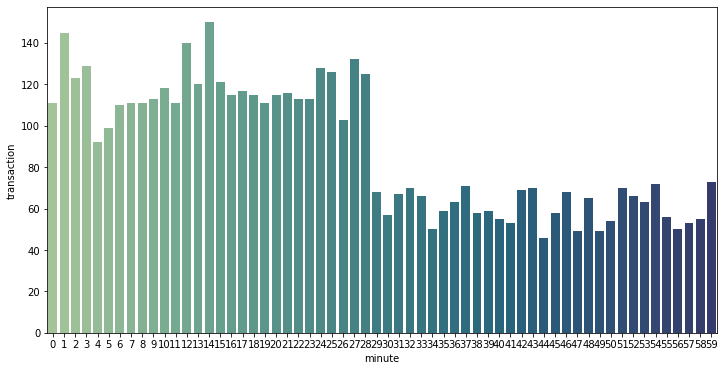

In [115]:
#посчитаем число транзакций в минуту и посмотрим на график
tr_per_minute = df_2.groupby('minute', as_index=False) \
                    .agg({'transaction': 'count'})
plt.figure(figsize=(12, 6))
sns.barplot(x='minute', y='transaction', data=tr_per_minute, palette='crest')

In [117]:
#в данные загружена лишь минутная часть времени без учета часов, поэтому создадим новую колонку с правильными значениями
df_2['true_minute'] = df_2.date.dt.minute + df_2.date.dt.hour * 60

In [122]:
#заново посчитаем число транзакций в минуту
tr_per_minute = df_2.groupby('true_minute', as_index=False) \
                    .agg({'transaction': 'count'})

<AxesSubplot:xlabel='true_minute', ylabel='transaction'>

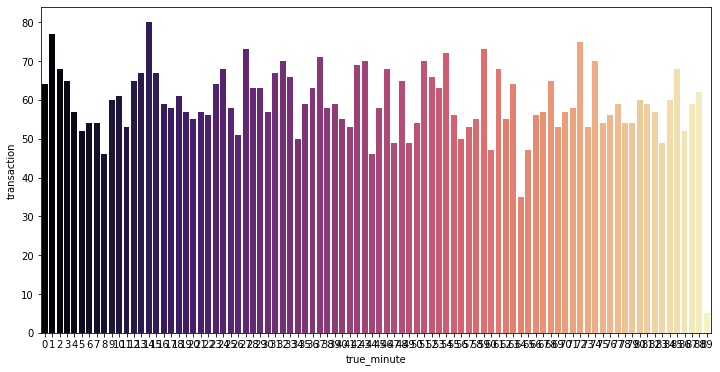

In [124]:
#посмотрим на график
plt.figure(figsize=(12, 6))
sns.barplot(x='true_minute', y='transaction', data=tr_per_minute, palette='magma')